[(98, 758, 284, 572)]


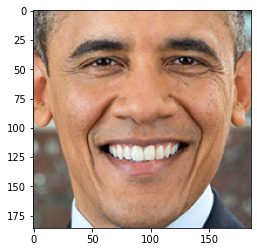

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [2]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    print(face_locations)

    return cropped_face

[(56, 282, 163, 175)]


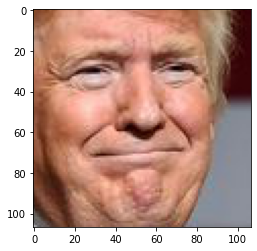

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/trump.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [4]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['clinton.jpeg', 'celebrity', 'trump.jpg', 'bush.jpeg', 'biden.jpg', 'reagan.jpg', 'my_image', 'obama.jpg']


In [5]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print(type(embedding))
print(len(embedding[0]))

embedding

[(98, 758, 284, 572)]
<class 'list'>
128


[array([-0.08126269,  0.11014768, -0.01082436, -0.05268788,  0.01033718,
        -0.00813816, -0.07251763, -0.0922645 ,  0.19304708, -0.09246373,
         0.23908535,  0.06770279, -0.22123131, -0.14119366,  0.05562147,
         0.13705502, -0.17924425, -0.07232318, -0.11183269, -0.1137081 ,
         0.03956441, -0.01019115,  0.09421787,  0.04493123, -0.12757549,
        -0.34449592, -0.05374937, -0.17703311,  0.0086822 , -0.09721596,
        -0.0981718 ,  0.00278224, -0.17721362, -0.12789804,  0.03489832,
        -0.01991243, -0.00838929, -0.00132872,  0.18308586,  0.02447556,
        -0.12376561,  0.09957034,  0.02323559,  0.22983313,  0.28385225,
         0.06655719, -0.00558919, -0.0983354 ,  0.10058986, -0.23476943,
         0.060063  ,  0.13415909,  0.08373024,  0.03900502,  0.1019453 ,
        -0.19337651,  0.01717638,  0.08978971, -0.16005102,  0.01892098,
         0.03082444, -0.0605129 , -0.04526768,  0.04633341,  0.20678672,
         0.10299793, -0.12437527, -0.04905149,  0.1

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        
       
        
        try:
            face = get_gropped_face(img_path)
        except:
            continue
        
        embedding = get_face_embedding(face)
        
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                                # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

        
    return embedding_dict

In [7]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

[(76, 135, 166, 46)]
[(56, 282, 163, 175)]
[(724, 1682, 1682, 723)]
[(502, 1093, 1168, 428)]
[(724, 1895, 1682, 936)]
[(98, 758, 284, 572)]


array([-0.15962461,  0.20268646,  0.0323635 ,  0.02439233, -0.06226433,
        0.0514071 ,  0.07351793, -0.16823342,  0.06962212, -0.05557969,
        0.17270111, -0.05094172, -0.35293111, -0.03164376,  0.03792981,
        0.1734385 , -0.13260117, -0.15357369, -0.23523541, -0.08442697,
       -0.00134133,  0.03210668, -0.08926147, -0.02670787, -0.09581173,
       -0.25792357, -0.01057008, -0.11071666,  0.03133569, -0.07444929,
        0.05670558, -0.02273803, -0.19461133, -0.04576058,  0.00947578,
        0.01806064, -0.15026242, -0.07787319,  0.17577602,  0.01933261,
       -0.19744579, -0.03930514,  0.07374467,  0.20196031,  0.14767544,
       -0.01415385,  0.01724756, -0.11976208,  0.09462965, -0.2431815 ,
       -0.02755117,  0.12169883,  0.148377  ,  0.17079775,  0.06952556,
       -0.15360464,  0.02005422,  0.08199161, -0.19544823,  0.10653654,
        0.11468483, -0.21902835, -0.07677593, -0.06791041,  0.10587607,
        0.05921577, -0.06115702, -0.11171094,  0.23917493, -0.15

In [8]:
import numpy as np

A = np.array([0.0019173615146428347, 0.17689529061317444, 0.0763588473200798, -0.024574430659413338, -0.13141091167926788, 0.0344821996986866, -0.0374063216149807, -0.07056370377540588, 0.048655178397893906, -0.03414120525121689, 0.22696012258529663, -0.061402369290590286, -0.24329672753810883, -0.039421431720256805, 0.0621466189622879, 0.1220191940665245, -0.1616966724395752, -0.06176016479730606, -0.18894734978675842, -0.06051916256546974, -0.010404378175735474, -0.05918719246983528, 0.02205268107354641, -0.06932859122753143, -0.20260301232337952, -0.2425234317779541, -0.04454419016838074, -0.11400106549263, -0.02022719383239746, -0.15134216845035553, 0.07622595876455307, -0.0323314443230629, -0.1404413878917694, -0.056338660418987274, -0.04520038887858391, -0.026131991297006607, -0.0352761372923851, -0.0679447203874588, 0.1318240910768509, 0.034210119396448135, -0.17475582659244537, 0.13853909075260162, -0.0027398746460676193, 0.227312833070755, 0.3029572069644928, 0.004932125099003315, 0.05853061378002167, -0.07521739602088928, 0.1443275809288025, -0.2340908795595169, 0.030092637985944748, 0.040133409202098846, 0.1672351360321045, 0.05728958174586296, 0.11475440859794617, -0.07548368722200394, 0.040267568081617355, 0.16487033665180206, -0.21067440509796143, 0.036163005977869034, 0.051559075713157654, -0.05994952470064163, 0.029524143785238266, -0.04122130945324898, 0.13074155151844025, 0.1142958477139473, -0.00561982998624444, -0.09740489721298218, 0.18533651530742645, -0.10422169417142868, -0.11409182846546173, 0.02283927984535694, -0.08339140564203262, -0.13673236966133118, -0.3275497853755951, -0.0002689119428396225, 0.2842463254928589, 0.13883619010448456, -0.29149484634399414, -0.07276060432195663, -0.03179163485765457, 0.011192545294761658, 0.03802505508065224, 0.03392524644732475, -0.03972085565328598, -0.12013585865497589, -0.06272879987955093, -0.026893358677625656, 0.2430601865053177, -0.12022019177675247, -0.010466678068041801, 0.20199882984161377, 0.051095910370349884, -0.13243277370929718, 0.06056740880012512, -0.04802423343062401, -0.12318279594182968, -0.013157366774976254, -0.12076889723539352, -0.07183175534009933, -0.01982908323407173, -0.15032584965229034, -0.026652328670024872, 0.06820419430732727, -0.24668177962303162, 0.1818322390317917, -0.01959969662129879, -0.07208395004272461, -0.0680316612124443, -0.038368165493011475, 0.021410271525382996, 0.06388168036937714, 0.2293335199356079, -0.22541724145412445, 0.19133104383945465, 0.24343697726726532, -0.04034627974033356, 0.07534503191709518, 0.017645064741373062, 0.054646339267492294, -0.046512290835380554, 0.07076910138130188, -0.0960201621055603, -0.12610889971256256, -0.017934376373887062, -0.010262779891490936, 0.01885927841067314, 0.057148948311805725])

B = np.array([-0.08116298168897629, 0.1283080279827118, 0.024102725088596344, -0.03748808428645134, 0.06578215956687927, -0.07137967646121979, -0.10578329861164093, -0.0911930501461029, 0.19589228928089142, -0.09603863954544067, 0.2447616308927536, 0.07736924290657043, -0.17048686742782593, -0.1277867704629898, 0.06390697509050369, 0.12272421270608902, -0.19242052733898163, -0.08341517299413681, -0.11065894365310669, -0.09501136839389801, -0.010332206264138222, -0.008188878186047077, 0.08251037448644638, 0.04358505830168724, -0.1455313265323639, -0.3595622479915619, -0.07877802848815918, -0.18927346169948578, -0.0018955999985337257, -0.06280332803726196, -0.06073163449764252, 0.03181075677275658, -0.15109844505786896, -0.08682074397802353, 0.017340943217277527, -0.020879391580820084, 0.008258359506726265, 0.016738882288336754, 0.16803768277168274, 0.039162665605545044, -0.09613757580518723, 0.06231086328625679, 0.00924085732549429, 0.2418847680091858, 0.26051488518714905, 0.07355985790491104, 0.05239278823137283, -0.08052310347557068, 0.08884726464748383, -0.24261267483234406, 0.05618546903133392, 0.12175332009792328, 0.09056758135557175, 0.04266638681292534, 0.16591356694698334, -0.2005864679813385, 0.01018378883600235, 0.08819808065891266, -0.15550008416175842, 0.0815843716263771, 0.03018287755548954, -0.025435002520680428, -0.06714558601379395, 0.009693139232695103, 0.22243273258209229, 0.13470745086669922, -0.1363328993320465, 0.01635543815791607, 0.18212205171585083, -0.03392908349633217, 0.0398673489689827, 0.0043264636769890785, -0.15493592619895935, -0.2530894875526428, -0.23155181109905243, 0.0678660124540329, 0.31580865383148193, 0.21846994757652283, -0.20842058956623077, 0.012199334800243378, -0.12194785475730896, 0.059383176267147064, 0.0768171101808548, -0.012840969488024712, -0.11975857615470886, -0.11892750859260559, -0.03087366186082363, 0.04432998597621918, 0.09186872839927673, 0.0821407362818718, -0.018520792946219444, 0.1962793618440628, -0.0566205158829689, 0.026071354746818542, 0.007139421068131924, 0.02185123600065708, -0.11292634904384613, -0.044381096959114075, -0.18024618923664093, -0.007845945656299591, 0.010368190705776215, -0.07480168342590332, -0.0035089245066046715, 0.09972234815359116, -0.18773995339870453, 0.0474785715341568, 0.025760797783732414, -0.042169712483882904, 0.0014017894864082336, 0.1201503798365593, -0.05088714882731438, -0.02051539719104767, 0.0884844958782196, -0.2176845818758011, 0.25695914030075073, 0.23358485102653503, 0.019985560327768326, 0.17838242650032043, 0.029055196791887283, 0.04518195986747742, -0.044122979044914246, -0.043431997299194336, -0.15906637907028198, -0.07155231386423111, 0.02525237947702408, 0.02502967044711113, 0.04127159342169762, 0.011846683919429779])

C = np.array([-0.0762145072221756, 0.09951083362102509, 0.0012626983225345612, -0.05529194697737694, -0.006535547785460949, -0.012212716042995453, -0.07667708396911621, -0.07388101518154144, 0.18756520748138428, -0.07589773088693619, 0.2424328476190567, 0.06438330560922623, -0.22197730839252472, -0.13409815728664398, 0.046808283776044846, 0.14692817628383636, -0.1844339370727539, -0.051137253642082214, -0.1149090975522995, -0.1297808736562729, 0.040612753480672836, -0.002555673476308584, 0.10426937788724899, 0.026295233517885208, -0.13127824664115906, -0.35947439074516296, -0.048153407871723175, -0.17165206372737885, -0.0002263905480504036, -0.10254599899053574, -0.08338439464569092, 0.014203382655978203, -0.18179851770401, -0.13200539350509644, 0.03813670203089714, -0.012789442203938961, -0.0030085663311183453, -0.007307708729058504, 0.17558619379997253, 0.025768719613552094, -0.12877899408340454, 0.11051110923290253, 0.03616628795862198, 0.22539083659648895, 0.2838597595691681, 0.07483825087547302, -0.0036694444715976715, -0.09967216849327087, 0.11106447875499725, -0.22961333394050598, 0.06397823244333267, 0.12394970655441284, 0.06568531692028046, 0.037825535982847214, 0.09586739540100098, -0.18721607327461243, 0.01674063131213188, 0.10057111084461212, -0.15766742825508118, 0.008397659286856651, 0.039109550416469574, -0.06041106954216957, -0.046033550053834915, 0.031240269541740417, 0.2121172845363617, 0.103468157351017, -0.1224282756447792, -0.05559460073709488, 0.12153220176696777, -0.018480442464351654, 0.039875734597444534, 0.007489997893571854, -0.18950346112251282, -0.20904967188835144, -0.23732705414295197, 0.0895664244890213, 0.3778454661369324, 0.16606193780899048, -0.20442475378513336, 0.018602905794978142, -0.18367978930473328, 0.04945264756679535, 0.08889186382293701, 0.002995049115270376, -0.06196683272719383, -0.13028381764888763, -0.03548961132764816, 0.053789377212524414, 0.08386979252099991, 0.016627438366413116, -0.040179431438446045, 0.2289249151945114, -0.02149147540330887, 0.05046383664011955, 0.02314644865691662, 0.05424635857343674, -0.1627081036567688, -0.01140156015753746, -0.18031321465969086, -0.06785157322883606, 0.03336677327752113, -0.06467186659574509, 0.0466950424015522, 0.12832939624786377, -0.2377130389213562, 0.06774994730949402, 0.013810726813971996, -0.019034255295991898, 0.04477768391370773, 0.0660984218120575, -0.031004268676042557, -0.03275192156434059, 0.06632497161626816, -0.24120087921619415, 0.2647172510623932, 0.2477877289056778, 0.054315339773893356, 0.17328208684921265, 0.06950142979621887, 0.019016757607460022, -0.01211759727448225, -0.014044362120330334, -0.17701464891433716, -0.03347969055175781, 0.04914966598153114, 0.05660251900553703, 0.0644666999578476, 0.012375651858747005])

print("슝=3")

슝=3


## L2 distance

In [9]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 0.8211549091846528
Distance between B and C: 0.34743558135053815


## L1 distance

In [10]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=1)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 7.720474720699713
Distance between B and C: 3.1546838842332363


In [11]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.8885117257487282

## 5개 이미지 Test

In [12]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [13]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962461,  0.20268646,  0.0323635 ,  0.02439233, -0.06226433,
          0.0514071 ,  0.07351793, -0.16823342,  0.06962212, -0.05557969,
          0.17270111, -0.05094172, -0.35293111, -0.03164376,  0.03792981,
          0.1734385 , -0.13260117, -0.15357369, -0.23523541, -0.08442697,
         -0.00134133,  0.03210668, -0.08926147, -0.02670787, -0.09581173,
         -0.25792357, -0.01057008, -0.11071666,  0.03133569, -0.07444929,
          0.05670558, -0.02273803, -0.19461133, -0.04576058,  0.00947578,
          0.01806064, -0.15026242, -0.07787319,  0.17577602,  0.01933261,
         -0.19744579, -0.03930514,  0.07374467,  0.20196031,  0.14767544,
         -0.01415385,  0.01724756, -0.11976208,  0.09462965, -0.2431815 ,
         -0.02755117,  0.12169883,  0.148377  ,  0.17079775,  0.06952556,
         -0.15360464,  0.02005422,  0.08199161, -0.19544823,  0.10653654,
          0.11468483, -0.21902835, -0.07677593, -0.06791041,  0.10587607,
          0.05921577, -0.06

# Nearest image

In [14]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], 
                                                  
 sort_key_func(sorted_faces[i][0])))

In [15]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('obama')

순위 1 : 이름(biden), 거리(0.8467204811863658)
순위 2 : 이름(bush), 거리(0.8628473387523206)
순위 3 : 이름(reagan), 거리(0.8692435942832952)
순위 4 : 이름(trump), 거리(0.8885117257487282)
순위 5 : 이름(clinton), 거리(0.9000997115067357)


# Celebrity image data to compare

In [16]:
cel_dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity'
cel_image_list = os.listdir(cel_dir_path)

print ("file_list: {}".format(cel_image_list))

file_list: ['승희.jpeg', '산들.jpeg', 'clinton.jpeg', '이대형.jpg', '박완규.png', '노무현.jpeg', '윤아.jpg', '꽈두룹.jpeg', '씨잼.jpg', '리사.jpg', '이효리.jpg', '손예진.jpeg', '이용진.jpg', '슬기.jpg', '나인뮤지스경리.jpg', '이동휘.jpg', '이광수.jpg', '한석규.jpg', '차범근.jpeg', '0.jpg', '잭 블랙.jpeg', '민니.jpg', '장도연.jpg', '한기범.jpg', '아이즈원조유리.jpeg', '제이크 질렌할.jpeg', '솔라.jpg', '온앤오프와이엇.jpg', '트와이스다현.jpeg', '이영하.jpg', '우기.jpg', '채연.jpg', '조이.jpg', '조정치.jpg', '영알남.png', '주진모(올드).jpg', '고창석.jpeg', '유지태.jpg', '조달환.png', '유해진.jpg', '김학범.jpg', '손흥민.jpg', '슈퍼비.jpeg', '차명석.jpg', '김래원.jpeg', '이희준.jpg', '태연.jpg', '제프리 힌턴.jpg', '티파니.jpg', '이성민.jpg', '김고은.jpeg', '아놀드 슈워제네거.jpg', '마동석.jpeg', '화사.jpg', '정준하.jpg', '피어스 브로스넌.jpg', '최현석.jpg', '신동엽.jpg', '딕헌터.jpeg', '배성우.png', '정수빈.jpg', '첸.jpg', '박신양.png', '톰 홀랜드.jpg', '문별.jpg', '박휘순.jpg', '박나래.jpeg', '김종서.jpg', '온앤오프라운.jpg', '서현진.jpg', '디오.jpeg', '크리스 햄스워스.jpg', '브래들리 쿠퍼.jpg', '류준열.jpg', '김광현.jpg', '길.jpg', '수호.jpg', '이승환.jpg', 'trump.jpg', '러블리즈지수.jpeg', '류승범.jpg', '박성호.jpg', '이종석.jpeg', '김남주.jpeg', '아이

# Data Embedding

In [17]:
embedding_dict = get_face_embedding_dict(cel_dir_path)

[(134, 562, 455, 241)]
[(76, 135, 166, 46)]
[(46, 218, 108, 156)]
[(53, 239, 182, 110)]
[(206, 526, 527, 205)]
[(93, 315, 316, 92)]
[(118, 414, 341, 191)]
[(502, 2277, 1168, 1611)]
[(134, 669, 455, 348)]
[(81, 356, 236, 201)]
[(36, 126, 126, 36)]
[(110, 325, 239, 196), (43, 550, 266, 340)]
[(82, 411, 211, 282)]
[(133, 356, 288, 201)]
[(231, 438, 498, 171)]
[(217, 489, 440, 266)]
[(142, 409, 409, 141)]
[(38, 95, 90, 43)]
[(160, 551, 345, 366)]
[(68, 163, 175, 55)]
[(241, 562, 562, 241)]
[(106, 374, 196, 285)]
[(68, 259, 175, 151)]
[(44, 118, 95, 66)]
[(142, 468, 409, 200)]
[(170, 562, 491, 241)]
[(201, 498, 468, 230)]
[(133, 322, 288, 167)]
[(98, 339, 253, 184)]
[(170, 419, 491, 98)]
[(175, 282, 283, 175)]
[(142, 438, 409, 171)]
[(171, 349, 439, 82)]
[(66, 205, 156, 116)]
[(64, 390, 219, 236)]
[(47, 179, 121, 104)]
[(80, 330, 187, 223)]
[(66, 225, 156, 135)]
[(206, 526, 527, 205)]
[(142, 439, 365, 216)]
[(80, 303, 155, 229)]
[(118, 283, 304, 97)]
[(67, 339, 196, 210)]
[(47, 146, 121, 71

# Nearest_face between celebrities and me

In [18]:
get_nearest_face('0')

순위 1 : 이름(박정민), 거리(0.552472101781793)
순위 2 : 이름(이용진), 거리(0.553033847395224)
순위 3 : 이름(배성우), 거리(0.5554371483552286)
순위 4 : 이름(이근대위), 거리(0.5572846278062907)
순위 5 : 이름(김희철), 거리(0.5604833127183919)


# My face and nearest face

[(160, 551, 345, 366)]
[(160, 386, 345, 201)]
[(110, 325, 239, 196), (43, 550, 266, 340)]
[(150, 339, 305, 184)]
[(247, 546, 632, 161)]
[(82, 325, 211, 196)]


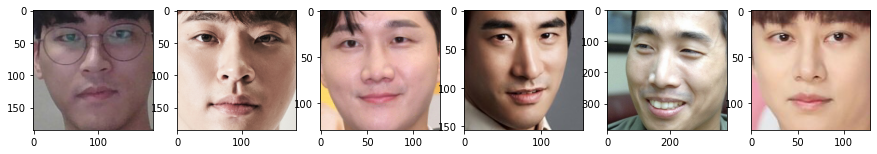

In [30]:
my_img_path = os.getenv('HOME')+'/aiffel/face_embedding/images/my_image/0.jpg'
cropped_myface = get_gropped_face(my_img_path)

nearset_img_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/박정민.jpg'
cropped_nearset1 = get_gropped_face(nearset_img_path)

nearset_img_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/이용진.jpg'
cropped_nearset2 = get_gropped_face(nearset_img_path)

nearset_img_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/배성우.png'
cropped_nearset3 = get_gropped_face(nearset_img_path)

nearset_img_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/이근대위.jpeg'
cropped_nearset4 = get_gropped_face(nearset_img_path)

nearset_img_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/김희철.jpg'
cropped_nearset5 = get_gropped_face(nearset_img_path)


fig, axes = plt.subplots(1, 6, figsize=(15, 3))
axes[0].imshow(cropped_myface)
axes[1].imshow(cropped_nearset1)
axes[2].imshow(cropped_nearset2)
axes[3].imshow(cropped_nearset3)
axes[4].imshow(cropped_nearset4)
axes[5].imshow(cropped_nearset5)
plt.show()

# ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이근대위 ㅋㅋㅋㅋㅋㅋ